# Problems

*Created by Marcin Kaminski as part of academic coursework for Computer Infrastructure at the Atlantic Technological University (ATU).*


## Problem 1: Data from yfinance

The following function:

- downloads all hourly data for the previous five days for the five FAANG stocks.

  *In finance, “FAANG” is an acronym that refers to the stocks of five of the most influential and best-performing American technology companies: Meta (META) (formerly known as Facebook), Amazon (AMZN), Apple (AAPL), Netflix (NFLX); and Alphabet (GOOG) (formerly known as Google).*

  Source: https://www.investopedia.com/terms/f/faang-stocks.asp
  <br>
  <br>

- saves the data into a folder called "data" in the root of this repository using a filename with the format "YYYYMMDD-HHmmss.csv" where "YYYYMMDD" is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and "HHmmss" is hour, minutes, seconds. 

In [1]:
# Import required libraries.

# Dates and times.
import datetime as dt # For handling dates and times. 
# Sourced from: https://realpython.com/ref/stdlib/datetime/

# Data frames.
import pandas as pd # For data manipulation and analysis. 
# https://en.wikipedia.org/wiki/Pandas_(software)
# Sourced from: https://www.geeksforgeeks.org/python/how-to-install-python-pandas-on-windows-and-linux/

# Yahoo Finance data.
import yfinance as yf # For downloading financial data from Yahoo Finance. 
# https://en.wikipedia.org/wiki/Yahoo_Finance
# https://github.com/ranaroussi/yfinance
# Sourced from: https://www.geeksforgeeks.org/python/how-to-import-yfinance-as-yf-in-python/

# Plotting.
import matplotlib.pyplot as plt # For creating static, animated, and interactive visualizations.
# Sourced from: https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

# File system paths.
from pathlib import Path # For handling filesystem paths in an object-oriented way.
# Sourced from: https://docs.python.org/3/library/pathlib.html

In [2]:
def get_data(days=5, interval='1h', folder='./data/'): # Download FAANG stock data and save to CSV.
# Sourced from: https://realpython.com/defining-your-own-python-function/#defining-functions-in-python

    """
    This function downloads FAANG stock data and saves it to a CSV file with the following default parameters:
    - days: 5 (downloads data for the last 5 days)
    - interval: '1h' (hourly data)
    - folder: './data/' (saves the file in the 'data' folder in the root directory)
    The filename format is "YYYYMMDD-HHmmss.csv".
    """

    # Define the list of FAANG stocks.
    FAANG = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
    """This line of code creates a list of FAANG stocks so that data can be downloaded for them. 
    These are the stock ticker symbols for Meta (formerly Facebook), Apple., Amazon, Netflix, and Google."""
    
    # Get the current date and time .
    now = dt.datetime.now() 
    """This piece of code retrieves the current local date and time using the now method from the datetime module."""
    # Sourced from: https://www.geeksforgeeks.org/python/get-current-date-and-time-using-python/
    
    # Download hourly data for each FAANG stock.
    df = yf.download(FAANG, period=f'{days}d', interval=interval, auto_adjust=True) 
    """In this step, we use the download function from the yfinance package. 
    It downloads data for the specified stocks (FAANG), for a given time period (days) and interval. 
    The auto_adjust parameter adjusts the data to reflect the closing price."""
    # Sourced from: https://www.kaggle.com/code/mustafacicek/yfinance-get-your-own-stock-data
    
    # Generate the filename with the current date and time.
    filename = folder + now.strftime("%Y%m%d-%H%M%S") + ".csv" # Filename format: "YYYYMMDD-HHmmss.csv".
    """Here we create the name of the file to which the data will be saved. 
    strftime is a method from the datetime module that allows formatting of a date and time object. 
    %Y stands for year, %m for month, %d for day, %H for hour, %M for minute, and %S for seconds."""
    # Sourced from: https://www.programiz.com/python-programming/datetime/strftime

    
    # Save the data to a CSV file.
    df.to_csv(filename)
    """Using the to_csv function from the pandas package, we save the created dataframe df to a CSV file named filename."""
    # Sourced from: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

    return filename
    # Sourced from: https://mimo.org/glossary/python/return
    """Finally, the function returns the name of the created file."""
    

In [3]:
get_data() # Call the function to download data and save it to a CSV file.
# Sourced from: https://realpython.com/defining-your-own-python-function/#calling-functions-in-python
# The function is called with default parameters.

[*********************100%***********************]  5 of 5 completed


'./data/20251219-012511.csv'

In [4]:
#get_data(days=3)
# Call the function to download data for the last 3 days and save it to a CSV file.

## Problem 2: Plotting Data

The following function:
- opens the latest data file in the "data" folder and, on one plot, plots the "Close" prices for each of the five stocks.

- saves the plot into the "plots" folder in the root of this repository using a filename in the format YYYYMMDD-HHmmss.png.


In [5]:
def plot_data(data_folder='./data/', plots_folder='./plots/'):
# Sourced from: https://realpython.com/defining-your-own-python-function/#defining-functions-in-python

    """
    Load the most recent CSV from data_folder, plot Close prices for FAANG,
    show the plot in the notebook, and save it into plots_folder.
    """
    # Define FAANG tickers.
    tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
    """This line of code creates a list of FAANG stocks so that data can be downloaded for them. 
    These are the stock ticker symbols for Meta (formerly Facebook), Apple., Amazon, Netflix, and Google."""

    # Convert data_folder to Path object.
    data_folder = Path(data_folder)
    """This piece of code converts the string data_folder into a Path object, 
    which makes it easier to manipulate and interact with the file system."""
    # Sourced from: https://docs.python.org/3/library/pathlib.html

    # Convert plots_folder to Path object.
    plots_folder = Path(plots_folder)
    """Similarly to the previous example, 
    this code snippet converts the string plots_folder into a Path object."""
    # Sourced from: https://docs.python.org/3/library/pathlib.html

    # Create plots folder if it doesn't exist.
    plots_folder.mkdir(parents=True, exist_ok=True) # Create plots folder if it doesn't exist.
    """Here, by using the mkdir method on the plots_folder object, the code creates a directory named plots_folder. 
    The parameter parents=True tells Python to create any missing parent directories, 
    and exist_ok=True prevents errors if the directory already exists."""
    # Sourced from: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir

    # Find latest CSV
    csv_files = sorted(data_folder.glob("*.csv"), key=lambda f: f.stat().st_mtime) # Sort by modification time.
    """This line of code retrieves all CSV files from the data folder using the glob function, 
    which allows searching for files that match a specific pattern. 
    Then, using the sorted function, the files are sorted by their modification date. 
    The lambda function is used here as the sorting key, enabling sorting by the file’s last modification time."""
    # Sourced from: https://stackoverflow.com/questions/76218516/how-to-import-all-csv-files-from-one-file-in-chronological-order-with-python
    # Sourced from: https://www.w3schools.com/python/python_lambda.asp

    if not csv_files:
        raise FileNotFoundError("No CSV files found in the data folder.") # Raise error if no files found.
    """This part of the code checks whether there are any CSV files in the data folder. 
        If not, a FileNotFoundError is raised with a message indicating that no CSV files were found in the data folder."""
    # Sourced from: https://realpython.com/ref/builtin-exceptions/filenotfounderror/


    latest_file = csv_files[-1] # Get the most recent file.
    """This line assigns the name of the most recent CSV file (the one modified last) to the variable latest_file. 
    It relies on the fact that the CSV files are sorted from the oldest to the newest, 
    so the last file in the list is the most recently modified one."""
    # Sourced from: https://sentry.io/answers/get-the-last-element-of-a-list-in-python/


    # Load yfinance multi-index CSV
    df = pd.read_csv(latest_file, header=[0,1], index_col=0, parse_dates=True) # Read CSV with multi-index columns.
    """This code uses the read_csv function from the pandas package to load the latest CSV file into a DataFrame. 
    The options header=[0,1] and index_col=0 indicate that the headers are located in the first two rows and 
    that the DataFrame should be indexed by the first column. 
    The parse_dates=True parameter ensures that any columns that can be interpreted as dates are automatically 
    parsed as date objects."""
    # Sourced from: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


    # Extract Close prices for available tickers
    available = [t for t in tickers if t in df['Close'].columns] # Check available tickers.
    """This line of code creates a list of tickers (stock symbols) that are available in the DataFrame. 
    It uses list comprehension to scan the tickers list and add only those tickers that exist as columns 
    in the 'Close' section of the DataFrame."""
    # Sourced from: https://www.geeksforgeeks.org/python/python-list-comprehension-using-if-else/


    close_df = df['Close'][available] # Get Close prices.
    """This line of code selects from the DataFrame df only the columns related to the closing prices ('Close') 
    for the tickers that are available (those listed in available). The result is stored in a new DataFrame named close_df."""

    # Ensure there is data to plot
    close_df = close_df.dropna(how='all') # Drop rows where all values are NaN.
    """This line removes any rows from close_df where all values are missing (NaN). 
    This ensures that only rows containing at least some valid data are kept."""
    # Soured from: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
    

    if close_df.shape[0] == 0: # Check if any data is left.
        raise ValueError( # Raise error if no data available.
            "No usable price data found. "
            "Re-run get_data() with more days (e.g., days=10)."
        )
    """This block checks whether the DataFrame still contains any rows after removing empty ones. If no data remains, 
    a ValueError is raised with a message suggesting rerunning the data-fetching function with a larger time range."""
    # Sourced from: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
    # Sourced from: https://realpython.com/ref/builtin-exceptions/valueerror/

    # Create plot
    plt.figure(figsize=(12, 6)) # Set figure size.
    """This line creates a new matplotlib figure with a specified size of 12 by 6 inches."""
    # Sourced from: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

    for t in available: # Loop through available tickers.
        plt.plot(close_df.index, close_df[t], label=t) # Plot each ticker's Close price.
    """Here, the code loops through all available tickers and plots their closing prices over time. 
    Each ticker is added as a separate line on the plot with a corresponding label."""
    # Sourced from: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    plt.xlabel("Time") # Set x-axis label.  
    plt.ylabel("Close Price (USD)") # Set y-axis label.
    plt.legend() # Show legend.
    """These lines label the x-axis and y-axis and display a legend to identify the plotted tickers."""
    # Sourced from: https://www.w3schools.com/python/matplotlib_labels.asp

    title_date = pd.to_datetime(close_df.index[-1]).strftime("%Y-%m-%d %H:%M:%S") # Format title date.
    plt.title(f"FAANG Close Prices — {title_date}") # Set plot title.
    """This code extracts the last timestamp from the DataFrame index, 
    formats it as a readable date and time, and uses it in the plot title."""
    # Sourced from: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
    # Sourced from: https://www.programiz.com/python-programming/datetime/strftime

    # Save plot
    timestamp = dt.datetime.now().strftime("%Y%m%d-%H%M%S") # Current timestamp for filename.
    plot_path = plots_folder / f"{timestamp}.png" # Define plot file path.
    plt.savefig(plot_path, dpi=200, bbox_inches='tight') # Save plot to file.
    """These lines generate a timestamped filename, construct the full path for the plot image, 
    and save the plot with high resolution."""
    # Sourced from: https://docs.python.org/3/library/datetime.html#datetime.datetime.strftime
    # Sourced from: https://www.geeksforgeeks.org/python/python-strftime-function/
    # Sourced from: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

    # Show plot in notebook
    plt.show() # Display the plot.
    """This command displays the plot in the notebook"""
    # Sourced from: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

    # Close figure to free memory
    plt.close() # Close the plot.
    """This line closes the plot to free up memory resources."""
    # Sourced from: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.close.html

    return str(plot_path) # Return the path to the saved plot.
    """This line returns the file path of the saved plot as a string."""
    # Sourced from: https://www.reddit.com/r/learnpython/comments/t7dx6b/can_someone_explain_to_me_the_return_function/
    # Sourced from: https://mimo.org/glossary/python/return


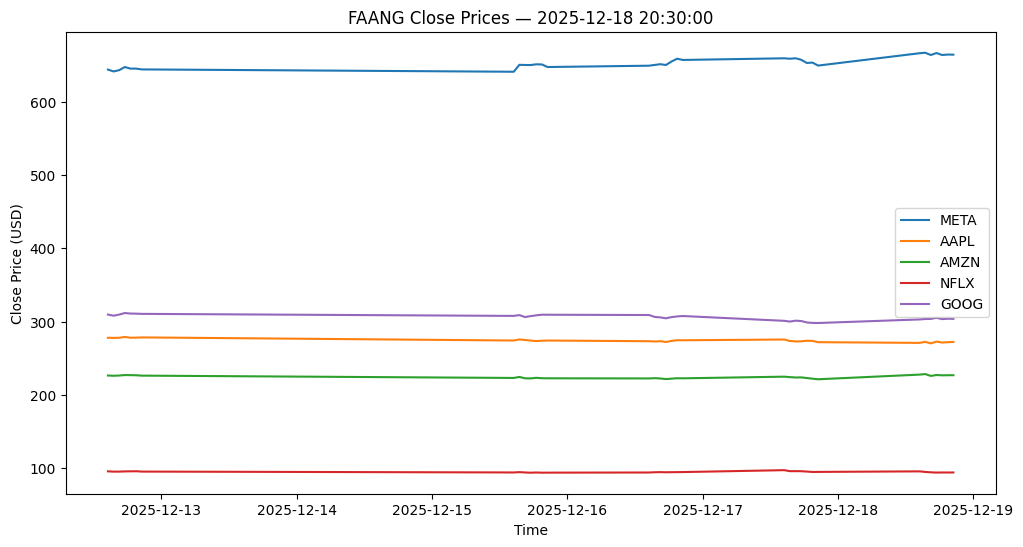

Saved to: plots/20251219-012512.png


In [6]:
file = plot_data() # Call the function to plot data.
# Sourced from: https://realpython.com/defining-your-own-python-function/#calling-functions-in-python

print("Saved to:", file) # Print the path where the plot was saved.

## Problem 3: Script

The following Python script called *faang.py* runs the above functions *get_data()* and *plot_data()* downloading the FAANG stocks data and creating the plot of Close prices for each of the five stocks.


[Open faang.py script](faang.py)

## Problem 4: Automation

The following GitHub Actions workflow called *faang.yml* runs the above Python script *faang.py* every Saturday morning.

[Open faang.yml workflow](https://github.com/Glogover/computer-infrastructure/blob/main/.github/workflows/faang.yml)

**GitHub Actions**

*GitHub Actions* is a continuous integration and continuous delivery (CI/CD) platform that allows you to automate your build, test, and deployment pipeline. You can create workflows that build and test every pull request to your repository, or deploy merged pull requests to production.*

*GitHub Actions goes beyond just DevOps and lets you run workflows when other events happen in your repository. For example, you can run a workflow to automatically add the appropriate labels whenever someone creates a new issue in your repository.*

*GitHub provides Linux, Windows, and macOS virtual machines to run your workflows, or you can host your own self-hosted runners in your own data center or cloud infrastructure.*

Source: https://docs.github.com/en/actions


<br>

**cron**

*cron is a shell command for scheduling a job (i.e. command or shell script) to run periodically at a fixed time, date, or interval.* 
*As scheduled, it is known as a cron job.*
*Although typically used to automate system maintenance and administration it can be used to automate any task.* 
*cron is most suitable for scheduling repetitive tasks as scheduling a one-time task can be accomplished via at.*

*The command name originates from Chronos, the Greek word for time.*

*The command is generally available on Unix-like operating systems.*

Source: https://en.wikipedia.org/wiki/Cron

# End